<a href="https://colab.research.google.com/github/shin-ing-bot/hello_Test/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 데이터 불러오기
df = pd.read_csv('netflix_titles.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = df[['title', 'type','release_year','country','rating','listed_in']].dropna()

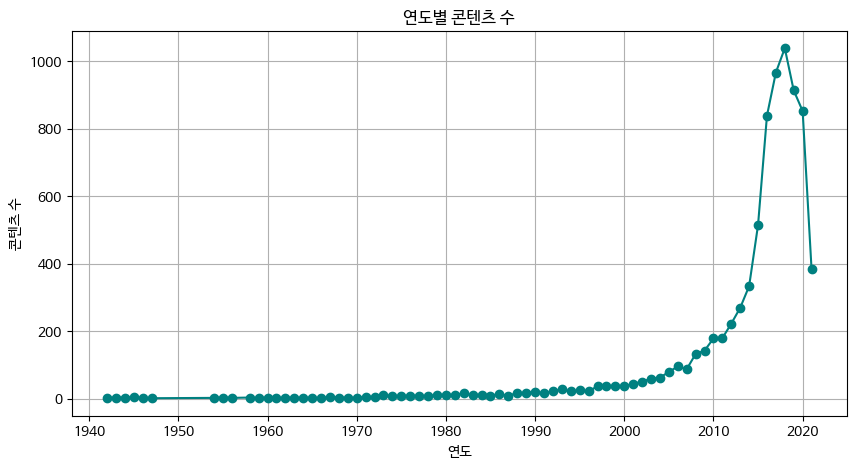

In [ ]:
# 연도 별 콘텐츠 수 (x: 연도, y: 콘텐츠 수)
yearly = df['release_year'].value_counts().sort_index()
yearly.head()
plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o', color='teal')
plt.title('연도별 콘텐츠 수')
plt.xlabel('연도')
plt.ylabel('콘텐츠 수')
plt.grid(True)
plt.show()

In [ ]:
# 장르별 비율(Top 10)
genres = df['listed_in'].str.split(', ').explode()
genres_counts = genres.value_counts().head(20)

In [ ]:
genres_counts

,count
listed_in,
International Movies,2543
Dramas,2316
Comedies,1580
International TV Shows,1127
Action & Adventure,817
Documentaries,794
Independent Movies,745
TV Dramas,663
Romantic Movies,588


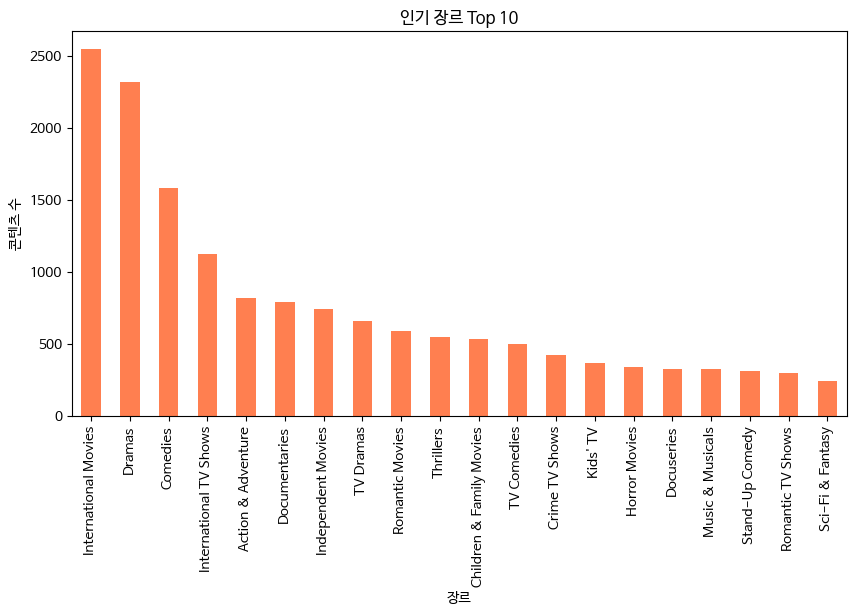

In [ ]:
plt.figure(figsize=(10, 5))
genres_counts.plot(kind='bar', color='coral')
plt.title('인기 장르 Top 10')
plt.xlabel('장르')
plt.ylabel('콘텐츠 수')
plt.show()

In [ ]:
# 국가별 콘텐츠
country_counts = df['country'].value_counts().head(20)

In [ ]:
country_counts

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,244
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


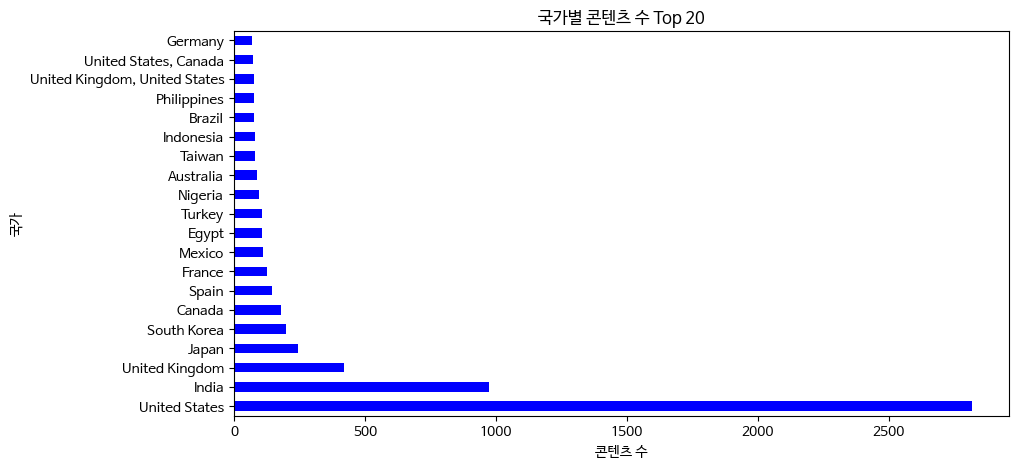

In [ ]:
plt.figure(figsize=(10, 5))
country_counts.plot(kind='barh', color='blue')
plt.title('국가별 콘텐츠 수 Top 20')
plt.xlabel('콘텐츠 수')
plt.ylabel('국가')
plt.show()